[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/AR-Karthik/ETG-MachineLearningCourse/blob/main/Linear%20Regression/Lasso%20and%20Ridge%20Regression.ipynb)

# Importing the required libararies

Lets import the required libraries as the first step.

In [1]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


# Loading the data:
Lets load the data and look at the features available in the data. We also print the first few records to understand about the data

In [2]:
cancer = load_breast_cancer()
print ("The list of columns are:", cancer.feature_names)

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

The list of columns are: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
X = cancer.data
Y = cancer.target

Lets split the data into train and test data using the train_test_split function available in sklearn library

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

# Building the Linear Regression model

In [5]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("Linear Regression Training score:", lr_train_score)
print ("Linear Regression Test score: ", lr_test_score)

Linear Regression Training score: 0.784220619405507
Linear Regression Test score:  0.7329325010888691


# Building a Lasso regressor

In [6]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("Linear Regression Training score:", train_score) 
print ("Linear Regression Test score: ", test_score)
print ("Number of features used: ", coeff_used)

Linear Regression Training score: 0.5600974529893081
Linear Regression Test score:  0.5832244618818156
Number of features used:  4


# Building a Lasso regressor with alpha = 0.01

In [7]:
lasso_alpha_01 = Lasso(alpha=0.01, max_iter=10e5)
lasso_alpha_01.fit(X_train,y_train)
train_score_01=lasso_alpha_01.score(X_train,y_train)
test_score_01=lasso_alpha_01.score(X_test,y_test)
coeff_used_01 = np.sum(lasso_alpha_01.coef_!=0)
print ("Training score when alpha is 0.01:", train_score_01)
print ("Test score when alpha is 0.01: ", test_score_01)
print ("Number of features used when alpha is 0.01:", coeff_used_01)

Training score when alpha is 0.01: 0.7037865778498829
Test score when alpha is 0.01:  0.6641831577726228
Number of features used when alpha is 0.01: 10


# Building a Lasso regressor with alpha = 0.0001

In [8]:
lasso_alpha_0001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso_alpha_0001.fit(X_train,y_train)
train_score_0001=lasso_alpha_0001.score(X_train,y_train)
test_score_0001=lasso_alpha_0001.score(X_test,y_test)
coeff_used_0001 = np.sum(lasso_alpha_0001.coef_!=0)
print ("Training score when alpha is 0.0001:", train_score_0001)
print ("Test score when alpha is 0.0001: ", test_score_0001)
print ("Number of features used when alpha is 0.0001:", coeff_used_0001)

Training score when alpha is 0.0001: 0.7754092006936698
Test score when alpha is 0.0001:  0.7318608210757911
Number of features used when alpha is 0.0001: 22


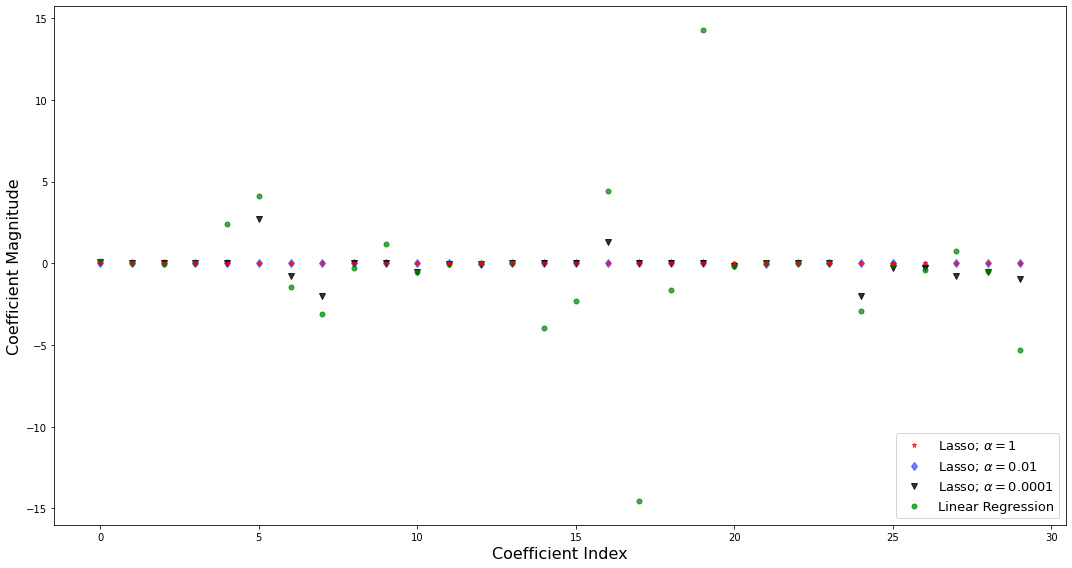

In [9]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso_alpha_01.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso_alpha_0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

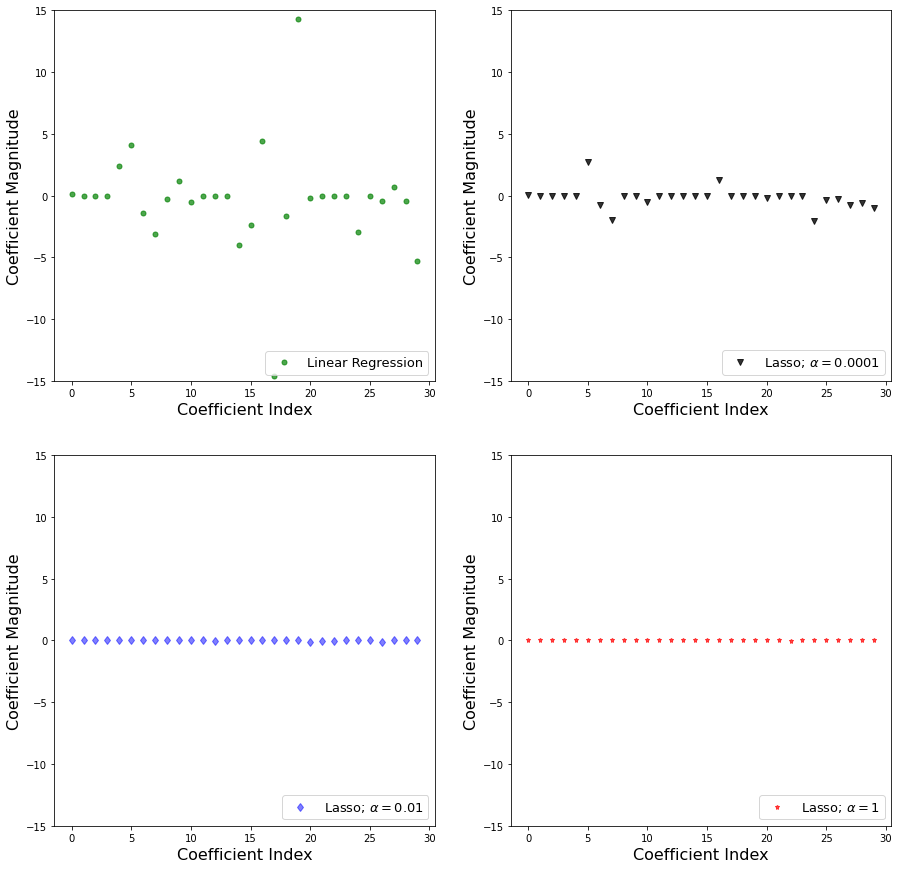

In [10]:
plt.rcParams['figure.figsize'] = [15, 15]

plt.subplot(2,2,4)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,3)
plt.plot(lasso_alpha_01.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,2)
plt.plot(lasso_alpha_0001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,1)
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)



# Building a Ridge regressor with alpha = 0.01

In [11]:
rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

# Building a Ridge regressor with alpha = 1

In [12]:
rr1 = Ridge(alpha=1) 
rr1.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

# Building a Ridge regressor with alpha = 100

In [13]:

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

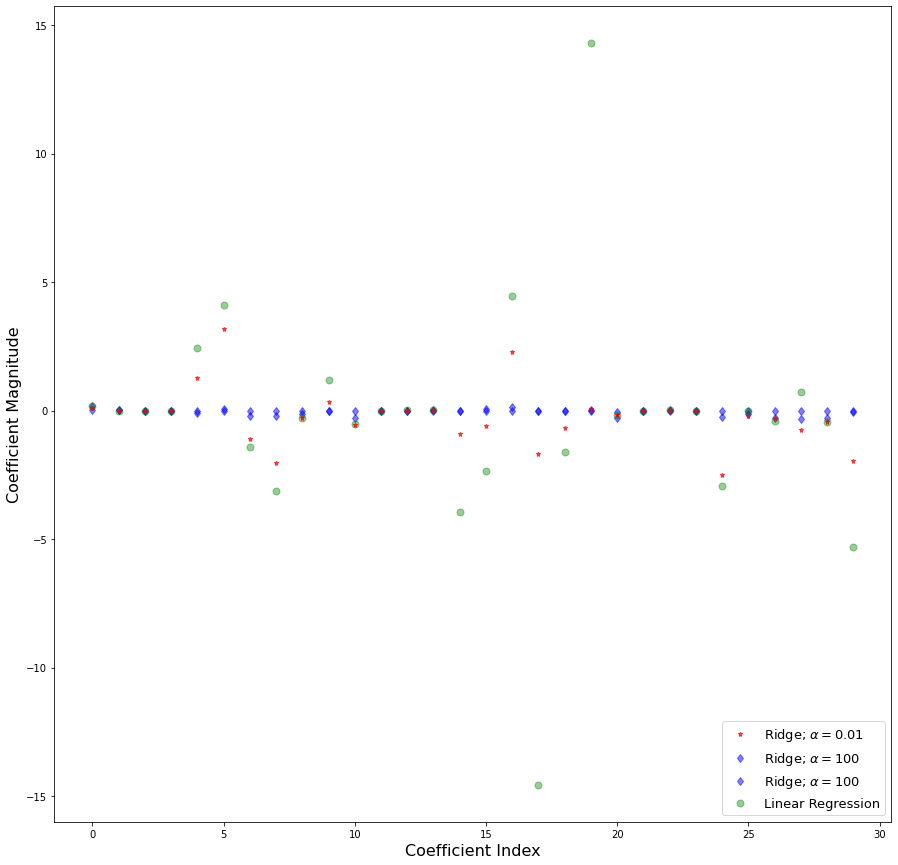

In [14]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

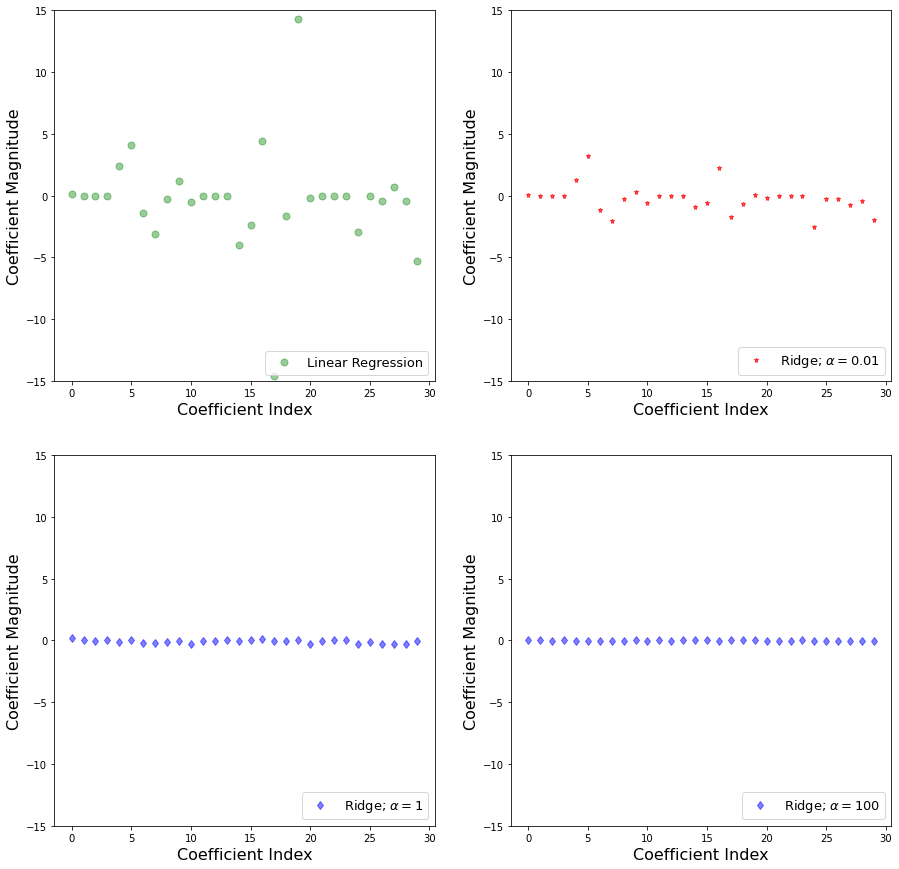

In [15]:
plt.rcParams['figure.figsize'] = [15, 15]


plt.subplot(2,2,1)
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,2)
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,3)
plt.plot(rr1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 1$') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)


plt.subplot(2,2,4)
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.ylim([-15,15])
plt.legend(fontsize=13,loc=4)

